In [1]:
"""Prédire la Valeur fonciere du bien avec les critères suivants : type local, code postal,Nombre pieces principales et Surface reelle bati, montrer les résultats sur un graphique grâce à Plotly"""

'Prédire la Valeur fonciere du bien avec les critères suivants : type local, code postal,Nombre pieces principales et Surface reelle bati, montrer les résultats sur un graphique grâce à Plotly'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from data_loader import load_house_attributes

In [2]:
df_paris = load_house_attributes('https://www.data.gouv.fr/fr/datasets/r/90a98de0-f562-4328-aa16-fe0dd1dca60f')

In [3]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33389 entries, 2405430 to 2459559
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Valeur fonciere            33389 non-null  float64
 1   Code postal                33389 non-null  object 
 2   Commune                    33389 non-null  object 
 3   Code departement           33389 non-null  object 
 4   Type local                 33389 non-null  object 
 5   Surface reelle bati        33389 non-null  float64
 6   Nombre pieces principales  33389 non-null  int32  
dtypes: float64(2), int32(1), object(4)
memory usage: 1.9+ MB


In [4]:
df_paris.describe()

,Valeur fonciere,Surface reelle bati,Nombre pieces principales
count,3.338900e+04,33389.000000,33389.000000
mean,8.599031e+05,52.250172,2.385546
std,1.318007e+06,39.815298,1.283726
min,1.500000e-01,5.000000,1.000000
25%,2.800000e+05,27.000000,1.000000
50%,4.680000e+05,42.000000,2.000000
75%,8.300000e+05,65.000000,3.000000
max,1.000000e+07,500.000000,17.000000


In [5]:
df_paris['Code postal'].value_counts()

75018.0    3707
75015.0    3260
75017.0    2872
75016.0    2806
75011.0    2711
75020.0    2224
75019.0    1995
75010.0    1868
75012.0    1761
75014.0    1730
75013.0    1454
75009.0    1310
75007.0     944
75005.0     879
75006.0     835
75003.0     779
75008.0     766
75004.0     578
75002.0     535
75001.0     375
Name: Code postal, dtype: int64

<Figure size 720x720 with 0 Axes>

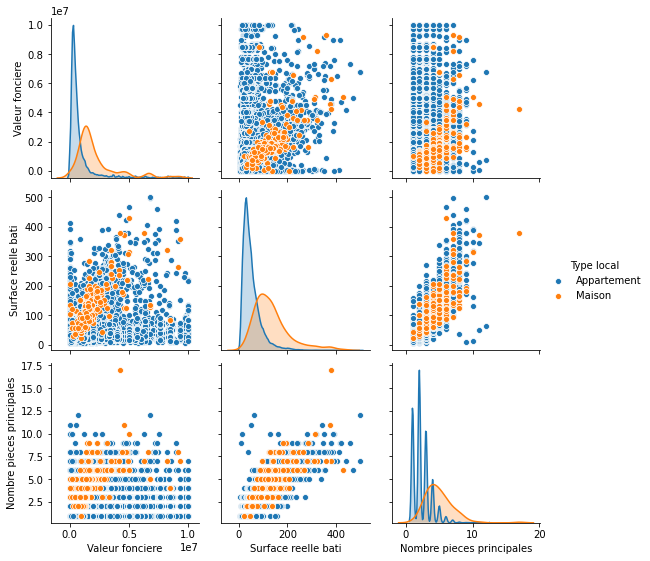

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.pairplot(df_paris[['Valeur fonciere','Surface reelle bati','Nombre pieces principales','Type local']], hue='Type local')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(df_paris, test_size=0.25, random_state=42)

In [9]:
print('Training Shape:', train.shape)
print('Testing Shape:', test.shape)

Training Shape: (25041, 7)
Testing Shape: (8348, 7)


In [10]:
from processing_attributes import process_house_attributes

In [11]:
train_x, test_x = process_house_attributes(df_paris, train, test)

In [12]:
train_y = train["Valeur fonciere"] 
test_y = test["Valeur fonciere"] 

In [13]:
from regr import regression

In [14]:
regr = regression(train_x, train_y)

In [15]:
for name, feature in zip(['Nombre pieces principales','Surface reelle bati', 'Code postal', 'Type local'], regr.feature_importances_):
    print(name, round(feature*100,1))

Nombre pieces principales 0.8
Surface reelle bati 11.3
Code postal 72.6
Type local 15.3


In [16]:
"""Les critères les plus importants pour prédire la valeur d'un bien à Paris sont l'arrondissement et la surface"""

"Les critères les plus importants pour prédire la valeur d'un bien à Paris sont l'arrondissement et la surface"

In [17]:
predictions = regr.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'euros.')

Mean Absolute Error: 574643.41 euros.


In [18]:
'NOT ENOUGH DATA TO HAVE A BETTER MODEL'

'NOT ENOUGH DATA TO HAVE A BETTER MODEL'

In [19]:
'Estimez votre bien :'

'Estimez votre bien :'

In [ ]:
print("Quelle est la surface du bien ? ")
surface = input()
print("Quelle est le nombre de pièce du bien ? ")
piece = input()
print("Est-ce un Appartement ou une Maison ? ")
type_bien = input()
print("Entrer le code postal : ")
arrondissement = input()

Quelle est la surface du bien ? 


In [ ]:
attributes = {'Surface reelle bati':[surface],
        'Nombre pieces principales':[piece], 
             'Type local': [type_bien], 
             'Code postal': [arrondissement]}

In [ ]:
df = pd.DataFrame(attributes)

In [ ]:
from inputs import process_attributes

In [ ]:
attr = process_attributes(df)
pred = regr.predict(attr)

In [ ]:
votre_estimation = pred.tolist()
print("Voici votre estimation :", round(np.mean(votre_estimation), 2), "euros.")